Importando Bibliotecas

In [2]:
#pip install pandas
import pandas as pd
#pip install numpy
import numpy as np
#pip install pandas-datareader
import pandas_datareader.data as web
#pip install seaborn
import seaborn as sns

#pip install yfinance
import yfinance as yf
yf.pdr_override()

Obtendo dados

In [81]:
# tickers = ["GOOG", 
#            "AAPL", 
#            "MSFT", 
#            "AMZN"]

tickers = ["VALE3.SA", 
           "ITSA4.SA",  
           "WEGE3.SA",
           "PETR4.SA",
           "BBAS3.SA",]

# ,
#            "USIM5.SA", 
#            "ABEV3.SA"

In [82]:
carteria = web.get_data_yahoo(tickers, period="5y")["Adj Close"]
ibov = web.get_data_yahoo("^BVSP", period="5y")["Adj Close"]

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


In [83]:
carteria

,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2018-09-06,21.172426,6.489493,6.763697,36.842518,9.085624
2018-09-10,20.883675,6.482803,6.859863,36.663406,9.113592
2018-09-11,19.938032,6.215196,6.589173,36.229393,8.903816
2018-09-12,20.028900,6.255339,6.749449,36.821850,8.763968
2018-09-13,19.760977,6.295477,6.663968,37.049191,8.735996
...,...,...,...,...,...
2023-08-31,47.099998,9.240000,31.940001,65.080002,35.880001
2023-09-01,47.419998,9.340000,32.630001,68.889999,35.950001
2023-09-04,47.270000,9.240000,32.290001,69.400002,36.130001


In [74]:
ibov

Date
2018-09-06     76416.0
2018-09-10     76436.0
2018-09-11     74657.0
2018-09-12     75125.0
2018-09-13     74687.0
                ...   
2023-08-31    115742.0
2023-09-01    117893.0
2023-09-04    117777.0
2023-09-05    117331.0
2023-09-06    115985.0
Name: Adj Close, Length: 1240, dtype: float64

Limpando, tratando e normalizando dados

In [84]:
carteria.isnull().sum()

BBAS3.SA    0
ITSA4.SA    0
PETR4.SA    0
VALE3.SA    0
WEGE3.SA    0
dtype: int64

In [76]:
ibov.isnull().sum()

0

In [89]:
carteria_normalizada = (carteria / carteria.iloc[0])*100
carteria_normalizada["saldo"] =  carteria_normalizada.sum(axis=1)


<Axes: xlabel='Date'>

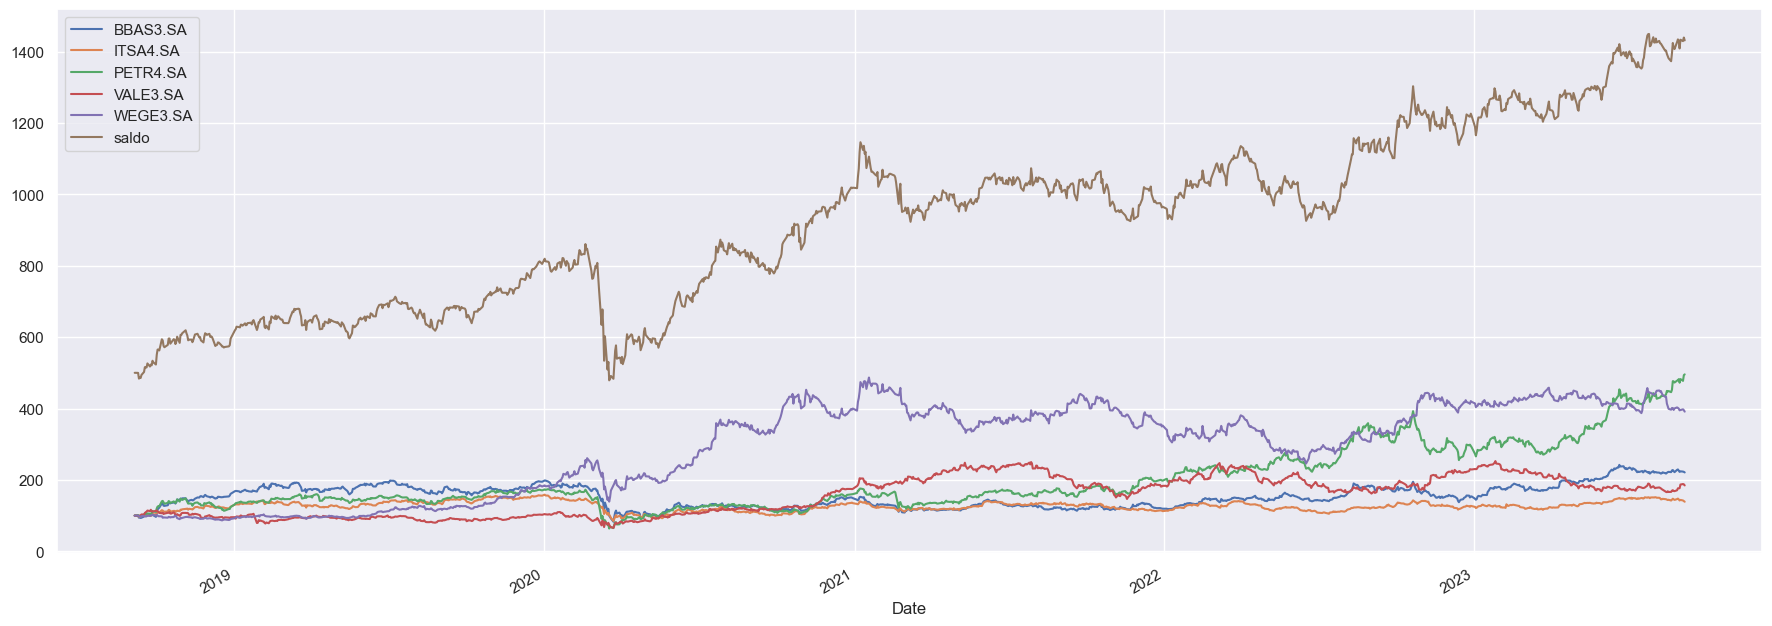

In [90]:
carteria_normalizada.plot(figsize=(22,8))

In [91]:
ibov_normalizado = (ibov / ibov.iloc[0])*100

<Axes: xlabel='Date'>

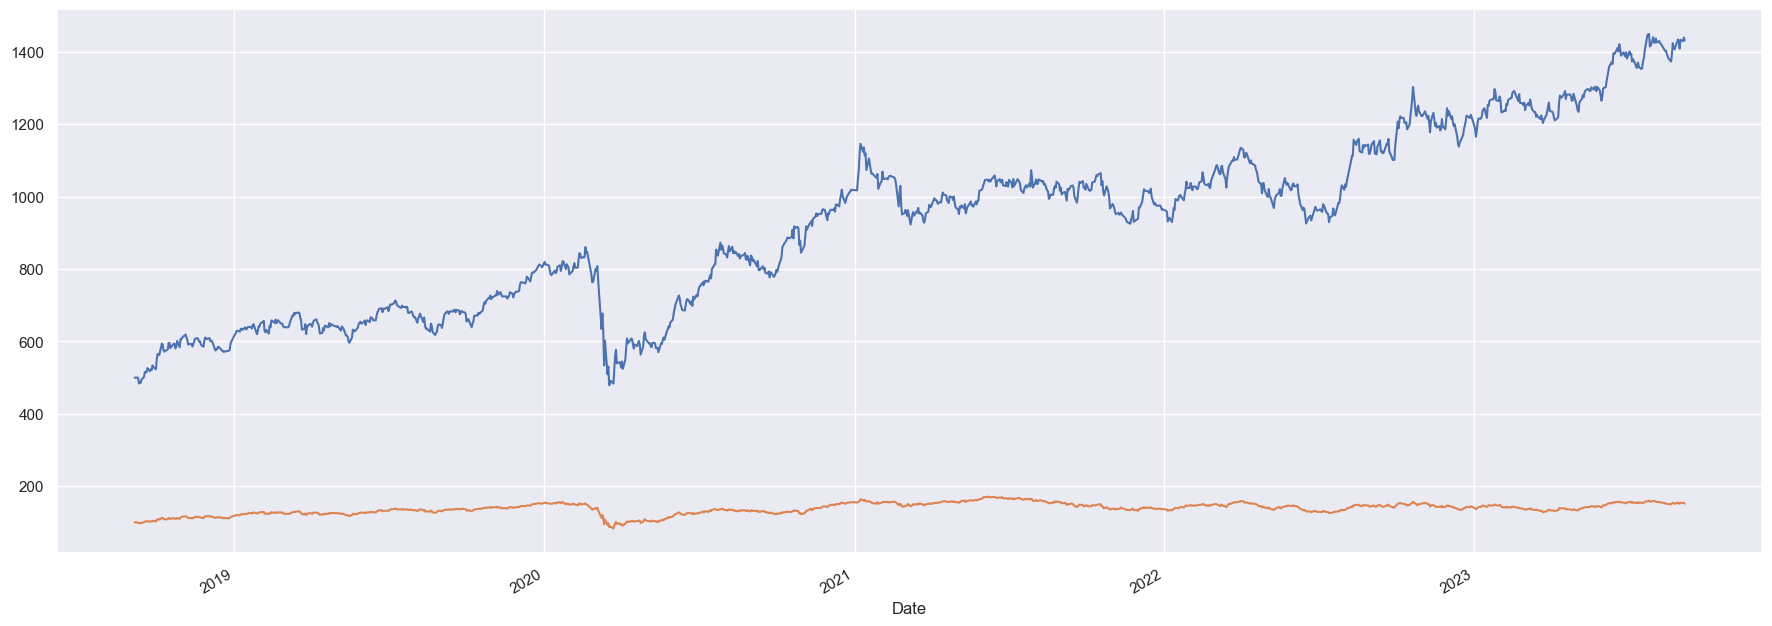

In [92]:
sns.set()
carteria_normalizada["saldo"].plot(figsize=(22,8),
                                   label="Carteria")
ibov_normalizado.plot(label="IBOV")